In [18]:
import yfinance as yf
import pandas as pd
import numpy as np

In [19]:
sp500 = yf.Ticker("^GSPC")

In [20]:
sp500 = sp500.history(period = "max")

In [21]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-01,3936.729980,3970.229980,3903.649902,3966.850098,3754570000,0,0
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,0,0
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,0,0,0


In [22]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-06',
               '2022-09-07', '2022-09-08'],
              dtype='datetime64[ns]', name='Date', length=18290, freq=None)

# Cleaning and visualizing stock market data:

<AxesSubplot:xlabel='Date'>

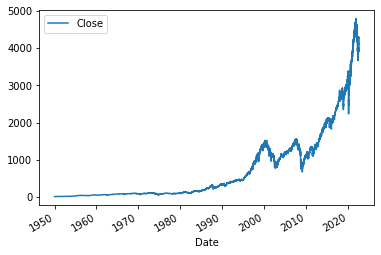

In [23]:
sp500.plot.line(y = "Close", use_index = True)

In [24]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [25]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [26]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-09-01,3936.729980,3970.229980,3903.649902,3966.850098,3754570000,3924.260010
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,3908.189941
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,0,3979.870117


In [27]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [28]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-09-01,3936.729980,3970.229980,3903.649902,3966.850098,3754570000,3924.260010,0
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,3908.189941,0
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,0,3979.870117,1


In [29]:
sp500 = sp500.loc["1990-01-01":].copy()

In [30]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-09-01,3936.729980,3970.229980,3903.649902,3966.850098,3754570000,3924.260010,0
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,3908.189941,0
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,0,3979.870117,1


# Training the ML model:

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [32]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [35]:
preds = pd.Series(preds, index = test.index)

In [36]:
precision_score(test["Target"], preds)

0.4523809523809524

In [37]:
combined = pd.concat([test["Target"], preds], axis = 1)

<AxesSubplot:xlabel='Date'>

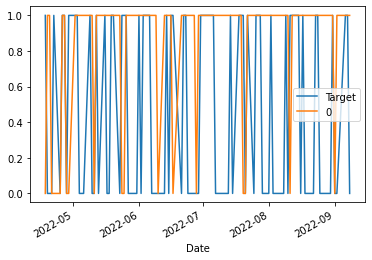

In [38]:
combined.plot()

In [39]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [40]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i: (i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [42]:
predictions = backtest(sp500, model, predictors)

In [43]:
predictions["Predictions"].value_counts()

0    3338
1    2398
Name: Predictions, dtype: int64

In [44]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5346121768140116

In [45]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.535914
0    0.464086
Name: Target, dtype: float64

In [48]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [51]:
sp500 = sp500.dropna()

In [52]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,4000.669922,4015.370117,3954.530029,3955.000000,3797860000,3966.850098,1,0.996076,0.0,0.977579,1.0,0.991844,26.0,0.912112,119.0,1.117791,544.0
2022-09-01,3936.729980,3970.229980,3903.649902,3966.850098,3754570000,3924.260010,0,1.001496,1.0,0.991897,1.0,0.995622,26.0,0.915325,120.0,1.120798,544.0
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,3908.189941,0,0.994603,1.0,0.987838,1.0,0.985722,26.0,0.905996,120.0,1.108446,543.0


# Improving the ML model

In [54]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [55]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [56]:
predictions = backtest(sp500, model, new_predictors) 

In [57]:
predictions["Predictions"].value_counts()

0.0    3930
1.0     805
Name: Predictions, dtype: int64

In [58]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5701863354037268